In [28]:
import pandas as pd
import re

# Load the data
file_path = '~/Desktop/ISP Project/Rookie_ADP.csv'
data = pd.read_csv(file_path)

# Function to clean and swap the player names
def clean_player_name(player):
    # Remove everything after and including the first bracket
    player = re.split(r'\(|\[', player)[0].strip()
    # Remove periods
    player = player.replace('.', '')
    # Swap the names
    if ',' in player:
        last_name, first_name = player.split(', ')
        player = f"{first_name} {last_name}"
    return player

# Apply the function to the Player column
data['Player'] = data['Player'].apply(clean_player_name)

# Save the cleaned data to a new CSV file
cleaned_file_path = '~/Desktop/ISP Project/Cleaned_Rookie_ADP_New.csv'
data.to_csv(cleaned_file_path, index=False)

print("Cleaned data saved to:", cleaned_file_path)


Cleaned data saved to: ~/Desktop/ISP Project/Cleaned_Rookie_ADP_New.csv


In [30]:
import os

# Define the file paths
cleaned_file_path = os.path.expanduser('~/Desktop/ISP Project/Cleaned_Rookie_ADP_New.csv')
stats_file_path = os.path.expanduser('~/Desktop/ISP Project/Stats.csv')

# Load the cleaned data
cleaned_data = pd.read_csv(cleaned_file_path)

# Load the stats data
stats_data = pd.read_csv(stats_file_path)

# Function to clean and swap the player names
def clean_player_name(player):
    # Remove everything after and including the first bracket
    player = re.split(r'\(|\[', player)[0].strip()
    # Swap the names
    if ',' in player:
        last_name, first_name = player.split(', ')
        player = f"{first_name} {last_name}"
    return player

# Clean player names in stats data
stats_data['Player'] = stats_data['Player'].astype(str).apply(clean_player_name)

# Filter players who played more than 10 games and play the positions WR, TE, RB, and QB
positions_of_interest = ['WR', 'TE', 'RB', 'QB']
filtered_stats = stats_data[(stats_data['Games_Played'] > 10) & (stats_data['Pos'].isin(positions_of_interest))]

# Find players not listed in the cleaned data
missing_players = filtered_stats[~filtered_stats['Player'].isin(cleaned_data['Player'])]['Player']

# Define the output file path
output_file_path = os.path.expanduser('~/Desktop/ISP Project/Missing_Players.csv')

# Save the missing players list to a new CSV file
missing_players.to_csv(output_file_path, index=False, header=['Player'])

print("Missing players saved to:", output_file_path)

Missing players saved to: /Users/christopherspence/Desktop/ISP Project/Missing_Players.csv


In [31]:
# Define the file paths
cleaned_file_path = os.path.expanduser('~/Desktop/ISP Project/Cleaned_Rookie_ADP_New.csv')
stats_file_path = os.path.expanduser('~/Desktop/ISP Project/Stats.csv')

# Load the cleaned rookie data
cleaned_data = pd.read_csv(cleaned_file_path)

# Load the stats data
stats_data = pd.read_csv(stats_file_path)

# Function to clean and swap the player names
def clean_player_name(player):
    # Remove everything after and including the first bracket
    player = re.split(r'\(|\[', player)[0].strip()
    # Remove periods
    player = player.replace('.', '')
    # Swap the names
    if ',' in player:
        last_name, first_name = player.split(', ')
        player = f"{first_name} {last_name}"
    return player

# Clean player names in stats data
stats_data['Player'] = stats_data['Player'].astype(str).apply(clean_player_name)

# Merge the stats data into the cleaned rookie data
merged_data = pd.merge(cleaned_data, stats_data, on='Player', how='left')

# Save the merged data to a new CSV file
merged_file_path = os.path.expanduser('~/Desktop/ISP Project/Merged_Rookie_Stats.csv')
merged_data.to_csv(merged_file_path, index=False)

print("Merged data saved to:", merged_file_path)

Merged data saved to: /Users/christopherspence/Desktop/ISP Project/Merged_Rookie_Stats.csv


In [38]:

# Load the CSV file
file_path = '~/Desktop/ISP Project/Merged_Rookie_Stats.csv'
df = pd.read_csv(file_path)

# Define the scoring criteria
scoring_criteria = {
    'Pass_yards': 0.1,
    'Pass_TD': 6,
    'Pass_Int': -2,
    'Rush_yards': 0.1,
    'Rush_TD': 6,
    'Rec_rec': 0.5,
    'Rec_yards': 0.1,
    'Rec_TD': 6
}

# Calculate the Total Fantasy Points
df['Total Fantasy Points'] = (
    df['Pass_yards'] * scoring_criteria['Pass_yards'] +
    df['Pass_TD'] * scoring_criteria['Pass_TD'] +
    df['Pass_Int'] * scoring_criteria['Pass_Int'] +
    df['Rush_yards'] * scoring_criteria['Rush_yards'] +
    df['Rush_TD'] * scoring_criteria['Rush_TD'] +
    df['Rec_rec'] * scoring_criteria['Rec_rec'] +
    df['Rec_yards'] * scoring_criteria['Rec_yards'] +
    df['Rec_TD'] * scoring_criteria['Rec_TD']
)

# Calculate the Fantasy Points Per Game
df['Fantasy Points Per Game'] = df['Total Fantasy Points'] / df['Games_Played']

# Save the updated dataframe to a new CSV file
updated_file_path = '~/Desktop/ISP Project/Merged_Rookie_Stats_with_Fantasy_Points.csv'
df.to_csv(updated_file_path, index=False)

print(f"Updated file saved to {updated_file_path}")


Updated file saved to ~/Desktop/ISP Project/Merged_Rookie_Stats_with_Fantasy_Points.csv


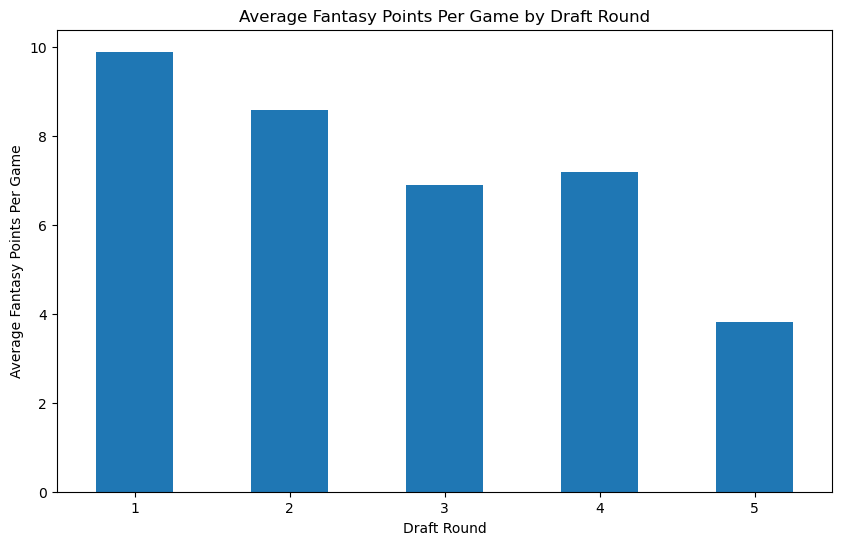

Updated file saved to ~/Desktop/ISP Project/Average_Fantasy_Points_Per_Game_by_Draft_Round.csv


In [40]:

import matplotlib.pyplot as plt

# Load the updated CSV file
file_path = '~/Desktop/ISP Project/Merged_Rookie_Stats_with_Fantasy_Points.csv'
df = pd.read_csv(file_path)

# Extract the draft round from the Draft_Rank column
df['Draft_Round'] = df['Draft_Rank'].apply(lambda x: int(str(x).split('.')[0]))

# Group by Draft_Round and calculate the average Fantasy Points Per Game
rounds_avg_fppg = df.groupby('Draft_Round')['Fantasy Points Per Game'].mean()

# Plot average Fantasy Points Per Game by Draft Round
plt.figure(figsize=(10, 6))
rounds_avg_fppg.plot(kind='bar')
plt.xlabel('Draft Round')
plt.ylabel('Average Fantasy Points Per Game')
plt.title('Average Fantasy Points Per Game by Draft Round')
plt.xticks(rotation=0)
plt.show()

# Save the dataframe to a new CSV file for further use
avg_fppg_file_path = '~/Desktop/ISP Project/Average_Fantasy_Points_Per_Game_by_Draft_Round.csv'
rounds_avg_fppg.to_csv(avg_fppg_file_path)

print(f"Updated file saved to {avg_fppg_file_path}")


Unique values in 'Pos' column:
['WR' 'RB' 'TE' 'QB' nan]


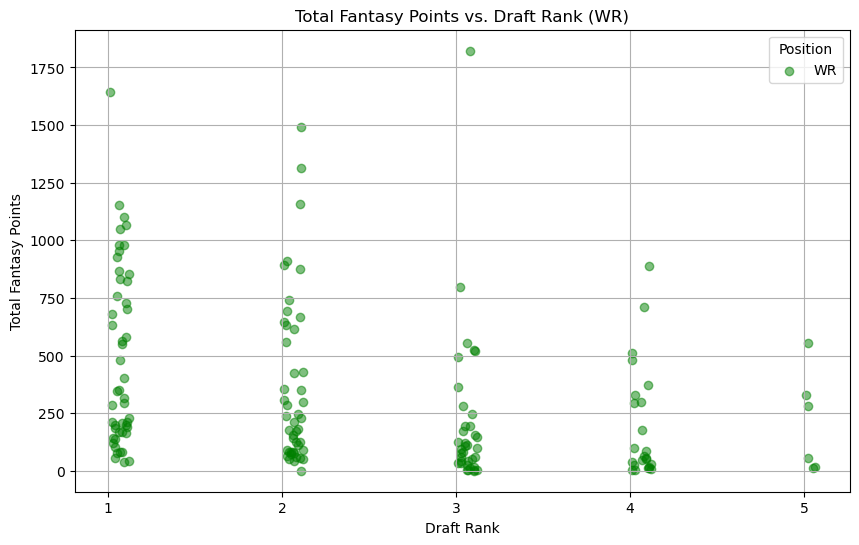

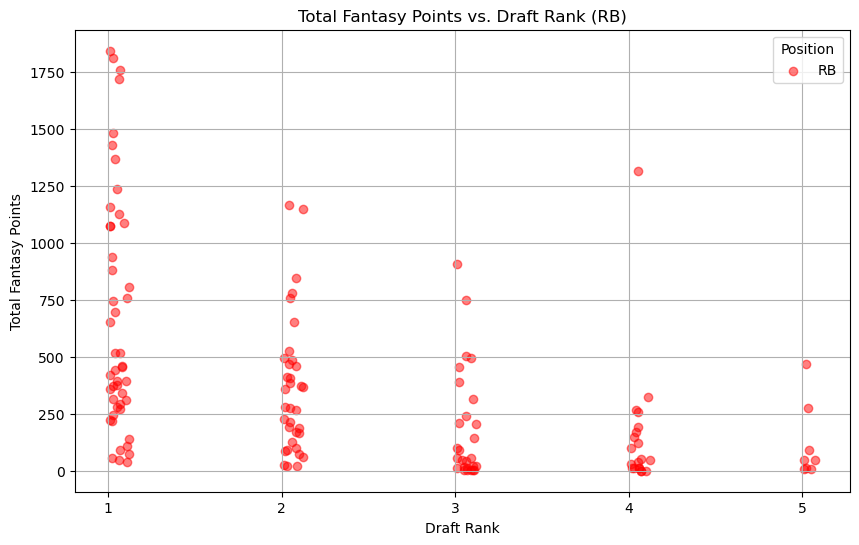

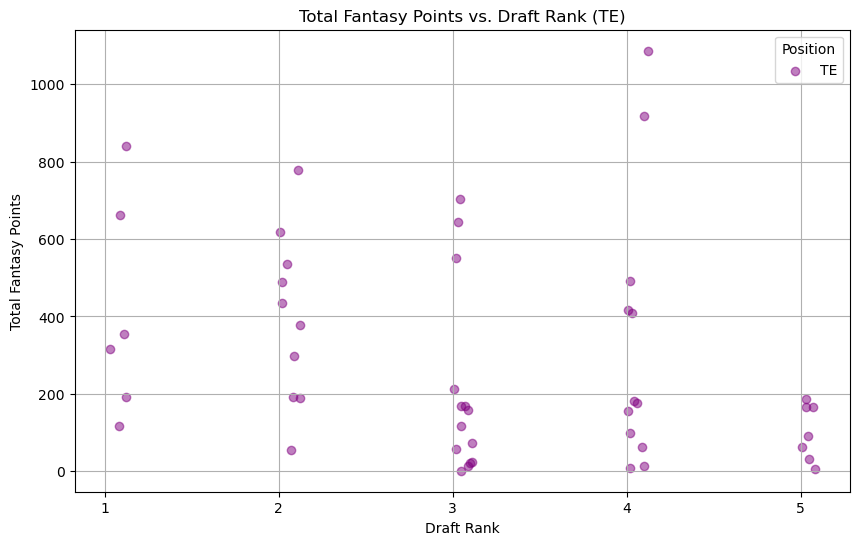

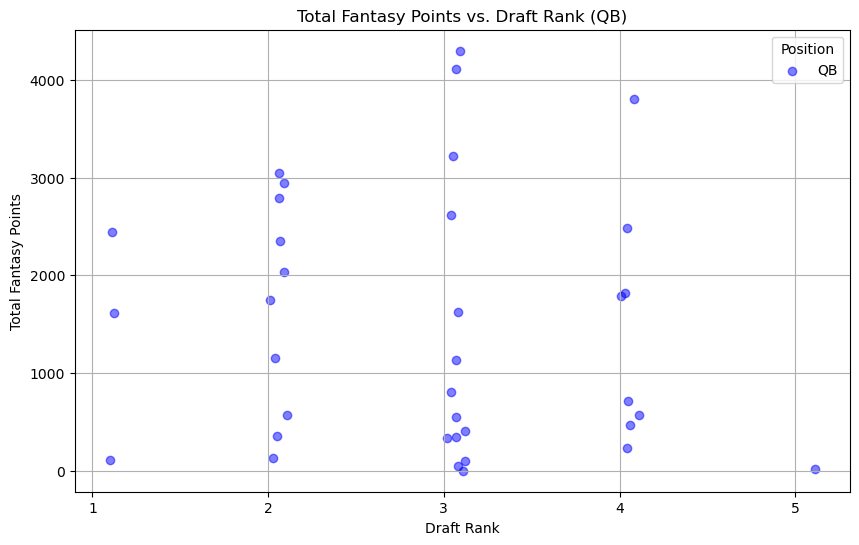

Correlation between Draft Rank and Total Fantasy Points: -0.18299538776806962
Updated file saved to ~/Desktop/ISP Project/Total_Fantasy_Points_vs_Draft_Rank.csv


In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the updated CSV file
file_path = '~/Desktop/ISP Project/Merged_Rookie_Stats_with_Fantasy_Points.csv'
df = pd.read_csv(file_path)

# Display unique values in the 'Pos' column to identify any NaNs or unexpected values
print("Unique values in 'Pos' column:")
print(df['Pos'].unique())

# Define a color map for positions, including a default color for NaN or unexpected values
position_colors = {
    'QB': 'blue',
    'WR': 'green',
    'RB': 'red',
    'TE': 'purple',
}

# Fill NaN values in 'Pos' with a placeholder, e.g., 'Unknown'
df['Pos'] = df['Pos'].fillna('Unknown')

# Map the positions to colors, using a default color for 'Unknown'
df['Color'] = df['Pos'].map(lambda x: position_colors.get(x, 'grey'))

# Create scatter plots for each position, excluding NaNs
positions = df['Pos'].unique()

for pos in positions:
    if pos == 'Unknown':
        continue  # Skip NaN/Unknown positions
    plt.figure(figsize=(10, 6))
    subset = df[df['Pos'] == pos]
    plt.scatter(subset['Draft_Rank'], subset['Total Fantasy Points'], alpha=0.5, color=position_colors.get(pos, 'grey'), label=pos)
    plt.xlabel('Draft Rank')
    plt.ylabel('Total Fantasy Points')
    plt.title(f'Total Fantasy Points vs. Draft Rank ({pos})')
    plt.legend(title='Position')
    plt.grid(True)
    plt.xticks(ticks=range(int(df['Draft_Rank'].min()), int(df['Draft_Rank'].max()) + 1))  # Set x-axis to whole numbers
    plt.show()

# Calculate the correlation between Draft Rank and Total Fantasy Points
correlation = df['Draft_Rank'].corr(df['Total Fantasy Points'])
print(f"Correlation between Draft Rank and Total Fantasy Points: {correlation}")

# Save the dataframe to a new CSV file for further use
comparison_file_path = '~/Desktop/ISP Project/Total_Fantasy_Points_vs_Draft_Rank.csv'
df[['Draft_Rank', 'Total Fantasy Points']].to_csv(comparison_file_path, index=False)

print(f"Updated file saved to {comparison_file_path}")


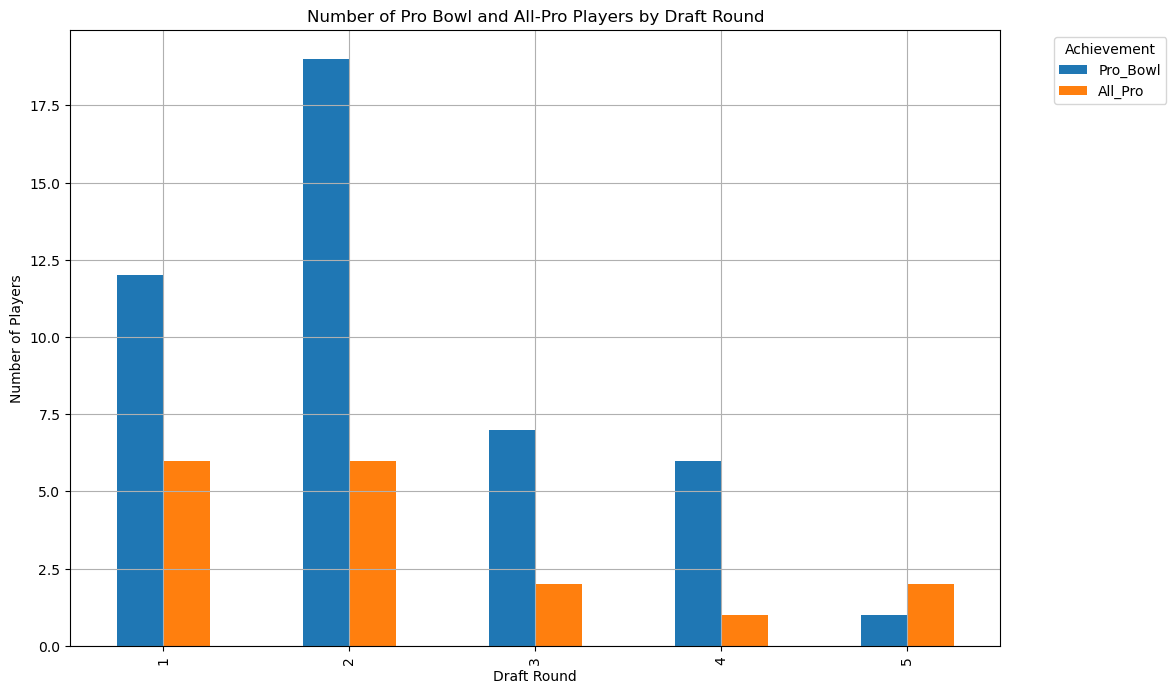

Updated file saved to ~/Desktop/ISP Project/Pro_Bowl_and_All_Pro_by_Draft_Round.csv


In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the updated CSV file
file_path = '~/Desktop/ISP Project/Merged_Rookie_Stats_with_Fantasy_Points.csv'
df = pd.read_csv(file_path)

# Extract the draft round from the Draft_Rank column
df['Draft_Round'] = df['Draft_Rank'].apply(lambda x: int(str(x).split('.')[0]))

# Calculate the number of Pro Bowl and All-Pro players for each draft round
pro_bowl_counts = df[df['Pro_Bowl'] == 1].groupby('Draft_Round').size()
all_pro_counts = df[df['All_Pro'] == 1].groupby('Draft_Round').size()

# Combine the counts into a single DataFrame
comparison_df = pd.DataFrame({
    'Pro_Bowl': pro_bowl_counts,
    'All_Pro': all_pro_counts
}).fillna(0)

# Plot the comparison
comparison_df.plot(kind='bar', figsize=(12, 8))
plt.xlabel('Draft Round')
plt.ylabel('Number of Players')
plt.title('Number of Pro Bowl and All-Pro Players by Draft Round')
plt.legend(title='Achievement', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Save the comparison DataFrame to a new CSV file for further use
comparison_file_path = '~/Desktop/ISP Project/Pro_Bowl_and_All_Pro_by_Draft_Round.csv'
comparison_df.to_csv(comparison_file_path)

print(f"Updated file saved to {comparison_file_path}")


Top 10 Colleges/Univ by Total Fantasy Points:
   College/Univ  Average Draft Position  Total Fantasy Points  \
1       Alabama                1.773333               13583.7   
64     Oklahoma                2.345714               11398.2   
63     Ohio St.                1.809375                8100.6   
15      Clemson                2.183333                7036.7   
38          LSU                1.924444                5814.6   
29      Georgia                2.267857                5494.7   
66       Oregon                2.396667                5173.9   
93          USC                2.057500                4935.5   
88   Texas Tech                2.716667                4747.7   
26  Florida St.                2.456000                4731.1   

    Number of Players Drafted  
1                          21  
64                         14  
63                         16  
15                          9  
38                          9  
29                         14  
66            

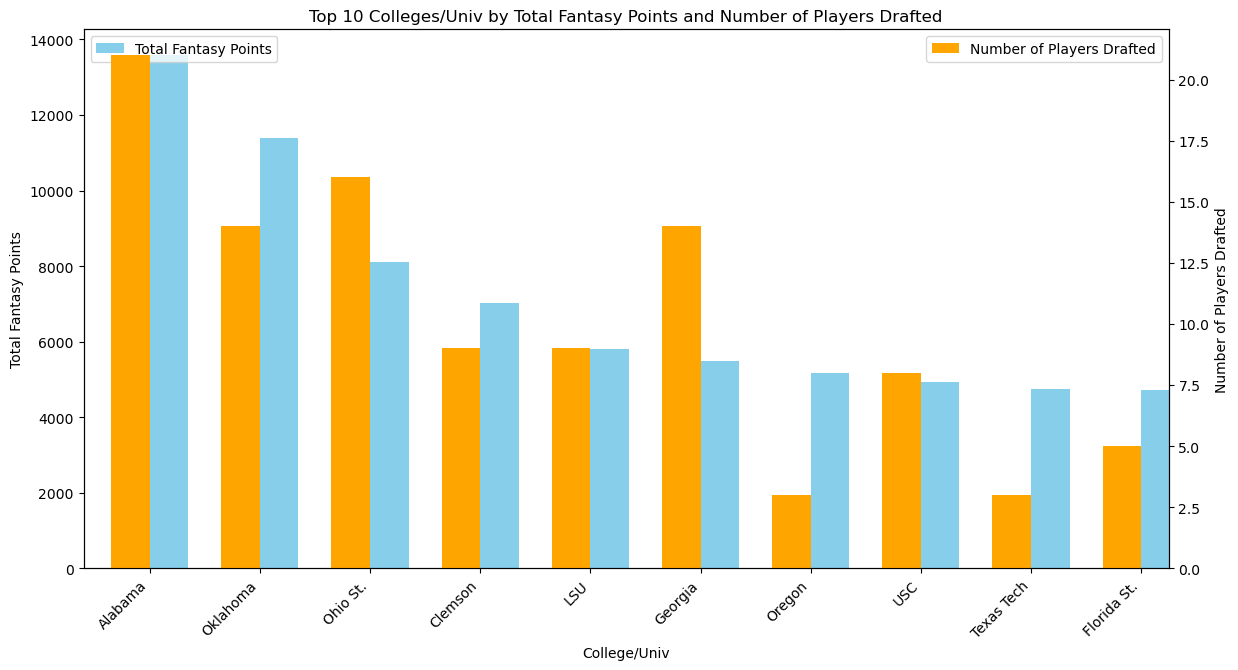

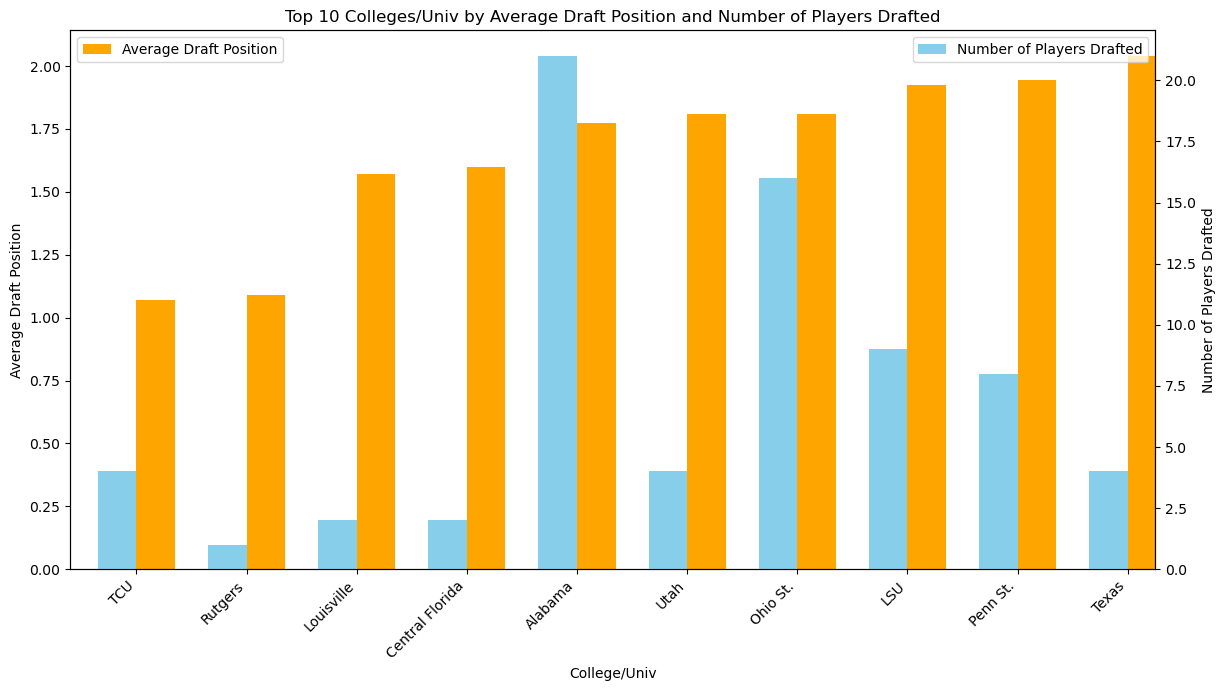

Files saved to ~/Desktop/ISP Project/Top_10_Colleges_by_Total_Fantasy_Points.csv and ~/Desktop/ISP Project/Top_10_Colleges_by_Average_Draft_Position.csv


In [71]:


# Load the updated CSV file
file_path = '~/Desktop/ISP Project/Merged_Rookie_Stats_with_Fantasy_Points.csv'
df = pd.read_csv(file_path)

# Group by College/Univ and calculate the mean draft position, total points scored, and number of players drafted
college_stats = df.groupby('College/Univ').agg({
    'Draft_Rank': 'mean',
    'Total Fantasy Points': 'sum',
    'Player': 'count'  # Assuming 'Player' column contains player names or IDs
}).reset_index()

# Rename columns for better understanding
college_stats.columns = ['College/Univ', 'Average Draft Position', 'Total Fantasy Points', 'Number of Players Drafted']

# Sort the colleges by total fantasy points scored and average draft position
top_colleges_by_points = college_stats.sort_values(by='Total Fantasy Points', ascending=False).head(10)
top_colleges_by_draft = college_stats.sort_values(by='Average Draft Position').head(10)

# Display the dataframes
print("Top 10 Colleges/Univ by Total Fantasy Points:")
print(top_colleges_by_points)

print("\nTop 10 Colleges/Univ by Average Draft Position:")
print(top_colleges_by_draft)

# Plot the results

# Top 10 Colleges/Univ by Total Fantasy Points
fig, ax1 = plt.subplots(figsize=(14, 7))
ax2 = ax1.twinx()
bar_width = 0.35

top_colleges_by_points.plot(kind='bar', x='College/Univ', y='Total Fantasy Points', ax=ax1, position=0, width=bar_width, color='skyblue', legend=False)
top_colleges_by_points.plot(kind='bar', x='College/Univ', y='Number of Players Drafted', ax=ax2, position=1, width=bar_width, color='orange', legend=False)

ax1.set_xlabel('College/Univ')
ax1.set_ylabel('Total Fantasy Points')
ax2.set_ylabel('Number of Players Drafted')
ax1.set_title('Top 10 Colleges/Univ by Total Fantasy Points and Number of Players Drafted')
ax1.set_xticks(range(len(top_colleges_by_points)))
ax1.set_xticklabels(top_colleges_by_points['College/Univ'], rotation=45, ha='right')

# Add legends
ax1.legend(['Total Fantasy Points'], loc='upper left')
ax2.legend(['Number of Players Drafted'], loc='upper right')

plt.show()

# Top 10 Colleges/Univ by Average Draft Position
fig, ax1 = plt.subplots(figsize=(14, 7))
ax2 = ax1.twinx()

top_colleges_by_draft.plot(kind='bar', x='College/Univ', y='Average Draft Position', ax=ax1, position=0, width=bar_width, color='orange', legend=False)
top_colleges_by_draft.plot(kind='bar', x='College/Univ', y='Number of Players Drafted', ax=ax2, position=1, width=bar_width, color='skyblue', legend=False)

ax1.set_xlabel('College/Univ')
ax1.set_ylabel('Average Draft Position')
ax2.set_ylabel('Number of Players Drafted')
ax1.set_title('Top 10 Colleges/Univ by Average Draft Position and Number of Players Drafted')
ax1.set_xticks(range(len(top_colleges_by_draft)))
ax1.set_xticklabels(top_colleges_by_draft['College/Univ'], rotation=45, ha='right')

# Add legends
ax1.legend(['Average Draft Position'], loc='upper left')
ax2.legend(['Number of Players Drafted'], loc='upper right')

plt.show()

# Save the dataframes to new CSV files for further use
top_colleges_by_points_file_path = '~/Desktop/ISP Project/Top_10_Colleges_by_Total_Fantasy_Points.csv'
top_colleges_by_draft_file_path = '~/Desktop/ISP Project/Top_10_Colleges_by_Average_Draft_Position.csv'

top_colleges_by_points.to_csv(top_colleges_by_points_file_path, index=False)
top_colleges_by_draft.to_csv(top_colleges_by_draft_file_path, index=False)

print(f"Files saved to {top_colleges_by_points_file_path} and {top_colleges_by_draft_file_path}")


Total and Average Fantasy Points by Position and Draft Round:
   Position  Draft_Round  Total Fantasy Points  Average Fantasy Points  \
0        QB            1                4158.9             1386.300000   
1        QB            2               17144.0             1714.400000   
2        QB            3               19592.0             1399.428571   
3        QB            4               11862.1             1482.762500   
4        QB            5                  17.0               17.000000   
5        RB            1               31403.2              668.153191   
6        RB            2               12682.9              362.368571   
7        RB            3                5093.9              188.662963   
8        RB            4                3108.7              155.435000   
9        RB            5                 954.4              119.300000   
10       TE            1                2480.5              413.416667   
11       TE            2                3966.9    

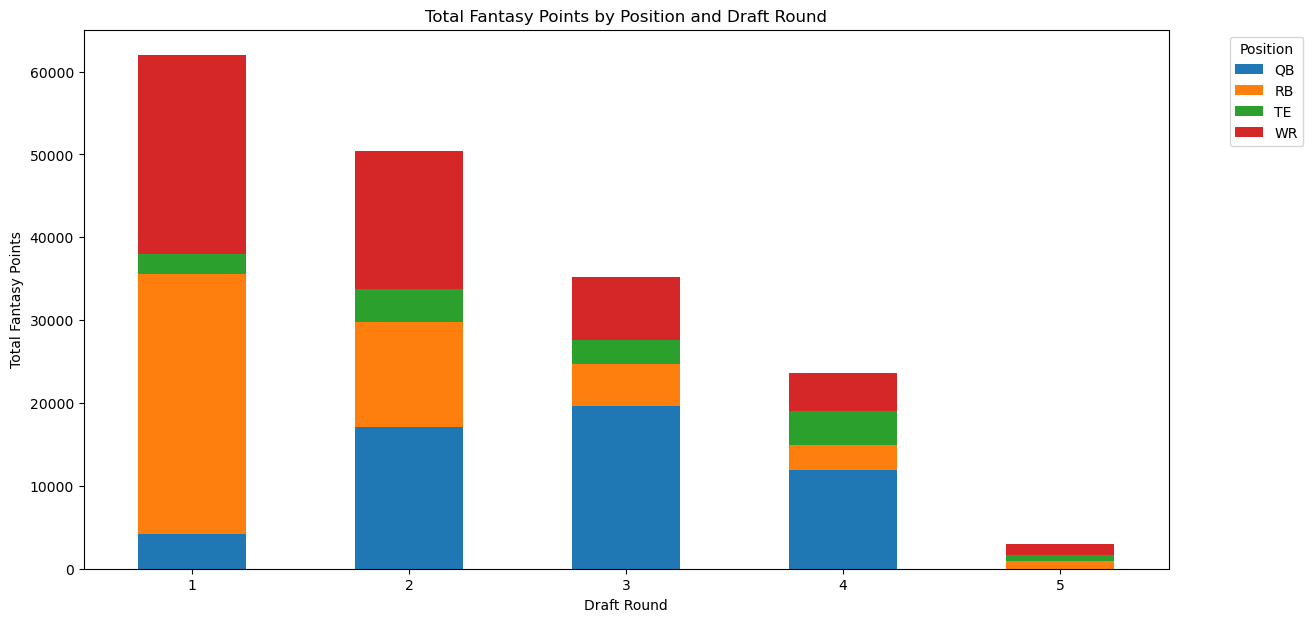

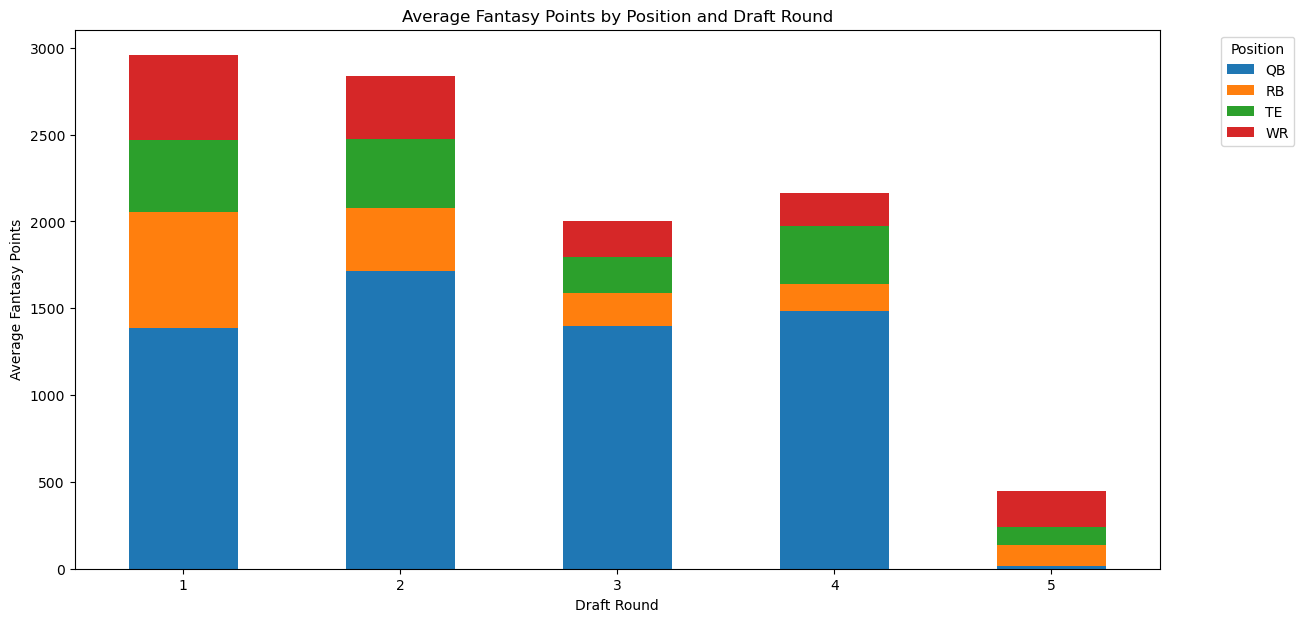

File saved to ~/Desktop/ISP Project/Total_and_Average_Fantasy_Points_by_Position_and_Draft_Round.csv


In [52]:


# Load the updated CSV file
file_path = '~/Desktop/ISP Project/Merged_Rookie_Stats_with_Fantasy_Points.csv'
df = pd.read_csv(file_path)

# Extract the draft round from the Draft_Rank column
df['Draft_Round'] = df['Draft_Rank'].apply(lambda x: int(str(x).split('.')[0]))

# Group by position and draft round to calculate total and average fantasy points
position_draft_stats = df.groupby(['Pos', 'Draft_Round']).agg({
    'Total Fantasy Points': ['sum', 'mean'],
    'Player': 'count'  # Assuming 'Player' column contains player names or IDs
}).reset_index()

# Flatten the multi-index columns
position_draft_stats.columns = ['Position', 'Draft_Round', 'Total Fantasy Points', 'Average Fantasy Points', 'Number of Players Drafted']

# Display the dataframe
print("Total and Average Fantasy Points by Position and Draft Round:")
print(position_draft_stats)

# Plot the results

# Total Fantasy Points by Position and Draft Round
fig, ax = plt.subplots(figsize=(14, 7))
position_draft_stats.pivot(index='Draft_Round', columns='Position', values='Total Fantasy Points').plot(kind='bar', stacked=True, ax=ax)
plt.xlabel('Draft Round')
plt.ylabel('Total Fantasy Points')
plt.title('Total Fantasy Points by Position and Draft Round')
plt.xticks(rotation=0)
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Average Fantasy Points by Position and Draft Round
fig, ax = plt.subplots(figsize=(14, 7))
position_draft_stats.pivot(index='Draft_Round', columns='Position', values='Average Fantasy Points').plot(kind='bar', stacked=True, ax=ax)
plt.xlabel('Draft Round')
plt.ylabel('Average Fantasy Points')
plt.title('Average Fantasy Points by Position and Draft Round')
plt.xticks(rotation=0)
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Save the dataframe to a new CSV file for further use
position_draft_file_path = '~/Desktop/ISP Project/Total_and_Average_Fantasy_Points_by_Position_and_Draft_Round.csv'
position_draft_stats.to_csv(position_draft_file_path, index=False)

print(f"File saved to {position_draft_file_path}")

##Points by position... identify the undervalued player

In [53]:

# Load the updated CSV file
file_path = '~/Desktop/ISP Project/Merged_Rookie_Stats_with_Fantasy_Points.csv'
df = pd.read_csv(file_path)

# Extract the draft round from the Draft_Rank column
df['Draft_Round'] = df['Draft_Rank'].apply(lambda x: int(str(x).split('.')[0]))

# Group by position and draft round to calculate average fantasy points
position_draft_stats = df.groupby(['Pos', 'Draft_Round']).agg({
    'Total Fantasy Points': 'mean',
    'Player': 'count'
}).reset_index()

# Flatten the multi-index columns
position_draft_stats.columns = ['Position', 'Draft_Round', 'Average Fantasy Points', 'Number of Players Drafted']

# Calculate the average fantasy points for each position by draft round
avg_fantasy_points = position_draft_stats.pivot(index='Draft_Round', columns='Position', values='Average Fantasy Points')

# Display the pivot table
print("\nAverage Fantasy Points by Position and Draft Round (Pivot Table):")
print(avg_fantasy_points)

# Define the positions needed
positions_needed = ['QB', 'WR', 'WR', 'RB', 'RB', 'TE', 'Flex', 'Flex']

# Determine the optimal draft strategy
draft_strategy = []
available_positions = positions_needed.copy()

for round_num in range(1, 6):  # Assuming we have 5 rounds to pick
    best_position = None
    max_points = 0
    for position in available_positions:
        if position in avg_fantasy_points.columns and round_num in avg_fantasy_points.index:
            points = avg_fantasy_points.loc[round_num, position]
            if points > max_points:
                max_points = points
                best_position = position
    if best_position:
        draft_strategy.append((round_num, best_position, max_points))
        available_positions.remove(best_position)

# Fill remaining positions with best available flex options
for round_num in range(len(draft_strategy) + 1, 6):
    best_position = None
    max_points = 0
    for position in ['RB', 'WR', 'TE']:  # Flex options
        if position in avg_fantasy_points.columns and round_num in avg_fantasy_points.index:
            points = avg_fantasy_points.loc[round_num, position]
            if points > max_points:
                max_points = points
                best_position = position
    if best_position:
        draft_strategy.append((round_num, 'Flex', max_points))
        available_positions.remove(best_position)

# Display the draft strategy
draft_strategy_df = pd.DataFrame(draft_strategy, columns=['Round', 'Position', 'Average Fantasy Points'])
print("\nOptimal Draft Strategy:")
print(draft_strategy_df)

# Save the draft strategy to a new CSV file for further use
draft_strategy_file_path = '~/Desktop/ISP Project/Optimal_Draft_Strategy.csv'
draft_strategy_df.to_csv(draft_strategy_file_path, index=False)

print(f"Draft strategy file saved to {draft_strategy_file_path}")



Average Fantasy Points by Position and Draft Round (Pivot Table):
Position              QB          RB          TE          WR
Draft_Round                                                 
1            1386.300000  668.153191  413.416667  488.010204
2            1714.400000  362.368571  396.690000  361.671739
3            1399.428571  188.662963  208.228571  207.056757
4            1482.762500  155.435000  334.683333  192.345833
5              17.000000  119.300000  101.328571  208.383333

Optimal Draft Strategy:
   Round Position  Average Fantasy Points
0      1       QB             1386.300000
1      2       TE              396.690000
2      3       WR              207.056757
3      4       WR              192.345833
4      5       RB              119.300000
Draft strategy file saved to ~/Desktop/ISP Project/Optimal_Draft_Strategy.csv


In [56]:


# Load the updated CSV file
file_path = '~/Desktop/ISP Project/Merged_Rookie_Stats_with_Fantasy_Points.csv'
df = pd.read_csv(file_path)

# Extract the draft pick position from the Draft_Rank column
df['Draft_Pick'] = df['Draft_Rank'].apply(lambda x: float(x))

# Group by position and draft pick to calculate average fantasy points
position_pick_stats = df.groupby(['Pos', 'Draft_Pick']).agg({
    'Total Fantasy Points': 'mean',
    'Player': 'count'
}).reset_index()

# Flatten the multi-index columns
position_pick_stats.columns = ['Position', 'Draft_Pick', 'Average Fantasy Points', 'Number of Players Drafted']

# Filter for first round picks (1.01 to 1.12)
first_round_picks = position_pick_stats[position_pick_stats['Draft_Pick'].between(1.01, 1.12)]

# Pivot table for average fantasy points by position and draft pick
avg_fantasy_points_first_round = first_round_picks.pivot(index='Draft_Pick', columns='Position', values='Average Fantasy Points')

# Display the pivot table
print("\nAverage Fantasy Points by Position and Draft Pick (1.01 to 1.12):")
print(avg_fantasy_points_first_round)

# Define the positions needed
positions_needed = ['QB', 'WR', 'WR', 'RB', 'RB', 'TE', 'Flex', 'Flex']

# Determine the optimal draft strategy for each pick in the first round
draft_strategy_first_round = []
available_positions = positions_needed.copy()

for pick in sorted(avg_fantasy_points_first_round.index):
    best_position = None
    max_points = 0
    for position in available_positions:
        if position in avg_fantasy_points_first_round.columns:
            points = avg_fantasy_points_first_round.loc[pick, position]
            if points > max_points:
                max_points = points
                best_position = position
    if best_position:
        draft_strategy_first_round.append((pick, best_position, max_points))
        available_positions.remove(best_position)

# Fill remaining positions with best available WR, RB, or TE (for Flex positions)
for pick in sorted(avg_fantasy_points_first_round.index):
    if len(draft_strategy_first_round) >= 12:
        break
    best_position = None
    max_points = 0
    for position in ['RB', 'WR', 'TE']:  # Flex options
        if position in avg_fantasy_points_first_round.columns:
            points = avg_fantasy_points_first_round.loc[pick, position]
            if points > max_points:
                max_points = points
                best_position = position
    if best_position and best_position in available_positions:
        draft_strategy_first_round.append((pick, best_position, max_points))
        available_positions.remove(best_position)

# Display the draft strategy for the first round
draft_strategy_first_round_df = pd.DataFrame(draft_strategy_first_round, columns=['Draft Pick', 'Position', 'Average Fantasy Points'])
print("\nOptimal Draft Strategy for First Round (1.01 to 1.12):")
print(draft_strategy_first_round_df)

# Save the draft strategy to a new CSV file for further use
draft_strategy_first_round_file_path = '~/Desktop/ISP Project/Optimal_Draft_Strategy_First_Round.csv'
draft_strategy_first_round_df.to_csv(draft_strategy_first_round_file_path, index=False)

print(f"Draft strategy file saved to {draft_strategy_first_round_file_path}")



Average Fantasy Points by Position and Draft Pick (1.01 to 1.12):
Position        QB           RB     TE           WR
Draft_Pick                                         
1.01           NaN   850.387500    NaN  1644.200000
1.02           NaN   703.980000    NaN   452.175000
1.03           NaN   828.283333  315.0   129.600000
1.04           NaN   755.850000    NaN   135.960000
1.05           NaN   572.300000    NaN   527.000000
1.06           NaN   964.600000    NaN   745.333333
1.07           NaN   585.800000    NaN   610.925000
1.08           NaN   419.166667  115.8   314.660000
1.09           NaN  1087.600000  663.2   522.566667
1.10         111.3   353.700000    NaN   547.000000
1.11        2438.2   301.100000  354.7   481.000000
1.12        1609.4   339.766667  515.9   376.400000

Optimal Draft Strategy for First Round (1.01 to 1.12):
   Draft Pick Position  Average Fantasy Points
0        1.01       WR             1644.200000
1        1.02       RB              703.980000
2       

In [57]:


# Load the updated CSV file
file_path = '~/Desktop/ISP Project/Merged_Rookie_Stats_with_Fantasy_Points.csv'
df = pd.read_csv(file_path)

# Extract the draft pick position from the Draft_Rank column
df['Draft_Pick'] = df['Draft_Rank'].apply(lambda x: float(x))

# Group by position and draft pick to calculate average fantasy points
position_pick_stats = df.groupby(['Pos', 'Draft_Pick']).agg({
    'Total Fantasy Points': 'mean',
    'Player': 'count'
}).reset_index()

# Flatten the multi-index columns
position_pick_stats.columns = ['Position', 'Draft_Pick', 'Average Fantasy Points', 'Number of Players Drafted']

# Pivot table for average fantasy points by position and draft pick
avg_fantasy_points = position_pick_stats.pivot(index='Draft_Pick', columns='Position', values='Average Fantasy Points')

# Display the pivot table
print("\nAverage Fantasy Points by Position and Draft Pick:")
print(avg_fantasy_points)

# Calculate the historical value for each draft pick by averaging the values across all positions
pick_values = avg_fantasy_points.mean(axis=1).reset_index()
pick_values.columns = ['Draft_Pick', 'Historical Value']

# Display the historical values for all picks
print("\nHistorical Values for All Picks:")
print(pick_values)

# Save the historical values to a new CSV file for further use
historical_values_file_path = '~/Desktop/ISP Project/Historical_Values_for_All_Picks.csv'
pick_values.to_csv(historical_values_file_path, index=False)

print(f"Historical values file saved to {historical_values_file_path}")



Average Fantasy Points by Position and Draft Pick:
Position          QB           RB           TE           WR
Draft_Pick                                                 
1.01             NaN   850.387500          NaN  1644.200000
1.02             NaN   703.980000          NaN   452.175000
1.03             NaN   828.283333   315.000000   129.600000
1.04             NaN   755.850000          NaN   135.960000
1.05             NaN   572.300000          NaN   527.000000
1.06             NaN   964.600000          NaN   745.333333
1.07             NaN   585.800000          NaN   610.925000
1.08             NaN   419.166667   115.800000   314.660000
1.09             NaN  1087.600000   663.200000   522.566667
1.10         111.300   353.700000          NaN   547.000000
1.11        2438.200   301.100000   354.700000   481.000000
1.12        1609.400   339.766667   515.900000   376.400000
2.01        1750.000   248.400000   619.300000   548.975000
2.02             NaN   241.733333   461.900000  

In [58]:


# Load the updated CSV file
file_path = '~/Desktop/ISP Project/Merged_Rookie_Stats_with_Fantasy_Points.csv'
df = pd.read_csv(file_path)

# Extract the draft pick position from the Draft_Rank column
df['Draft_Pick'] = df['Draft_Rank'].apply(lambda x: float(x))

# Group draft picks into groups of three
def group_picks(pick):
    if 1.01 <= pick <= 1.03:
        return '1.01-1.03'
    elif 1.04 <= pick <= 1.06:
        return '1.04-1.06'
    elif 1.07 <= pick <= 1.09:
        return '1.07-1.09'
    elif 1.10 <= pick <= 1.12:
        return '1.10-1.12'
    elif 2.01 <= pick <= 2.03:
        return '2.01-2.03'
    elif 2.04 <= pick <= 2.06:
        return '2.04-2.06'
    elif 2.07 <= pick <= 2.09:
        return '2.07-2.09'
    elif 2.10 <= pick <= 2.12:
        return '2.10-2.12'
    elif 3.01 <= pick <= 3.03:
        return '3.01-3.03'
    elif 3.04 <= pick <= 3.06:
        return '3.04-3.06'
    elif 3.07 <= pick <= 3.09:
        return '3.07-3.09'
    elif 3.10 <= pick <= 3.12:
        return '3.10-3.12'
    else:
        return '4.01+'

df['Draft_Pick_Group'] = df['Draft_Pick'].apply(group_picks)

# Group by position and draft pick group to calculate average fantasy points
position_pick_stats = df.groupby(['Pos', 'Draft_Pick_Group']).agg({
    'Total Fantasy Points': 'mean',
    'Player': 'count'
}).reset_index()

# Flatten the multi-index columns
position_pick_stats.columns = ['Position', 'Draft_Pick_Group', 'Average Fantasy Points', 'Number of Players Drafted']

# Pivot table for average fantasy points by position and draft pick group
avg_fantasy_points_grouped = position_pick_stats.pivot(index='Draft_Pick_Group', columns='Position', values='Average Fantasy Points')

# Display the pivot table
print("\nAverage Fantasy Points by Position and Draft Pick Group:")
print(avg_fantasy_points_grouped)

# Calculate the historical value for each draft pick group by averaging the values across all positions
pick_group_values = avg_fantasy_points_grouped.mean(axis=1).reset_index()
pick_group_values.columns = ['Draft_Pick_Group', 'Historical Value']

# Display the historical values for all draft pick groups
print("\nHistorical Values for All Draft Pick Groups:")
print(pick_group_values)

# Save the historical values to a new CSV file for further use
historical_values_grouped_file_path = '~/Desktop/ISP Project/Historical_Values_for_All_Draft_Pick_Groups.csv'
pick_group_values.to_csv(historical_values_grouped_file_path, index=False)

print(f"Historical values file saved to {historical_values_grouped_file_path}")



Average Fantasy Points by Position and Draft Pick Group:
Position                   QB          RB          TE          WR
Draft_Pick_Group                                                 
1.01-1.03                 NaN  804.878947  315.000000  530.300000
1.04-1.06                 NaN  746.036364         NaN  483.986667
1.07-1.09                 NaN  586.011111  389.500000  476.826667
1.10-1.12         1386.300000  328.750000  462.166667  482.350000
2.01-2.03          941.600000  221.833333  514.366667  472.033333
2.04-2.06         1837.475000  482.575000  536.100000  175.755556
2.07-2.09         2445.633333  359.557143  181.400000  205.981818
2.10-2.12          574.000000  339.800000  447.833333  508.921429
3.01-3.03          331.500000  277.137500  366.475000  212.040000
3.04-3.06         2213.666667  228.842857  247.625000  164.670000
3.07-3.09         1730.914286  113.360000  113.100000  338.671429
3.10-3.12          167.700000  101.157143   39.833333  152.330000
4.01+             

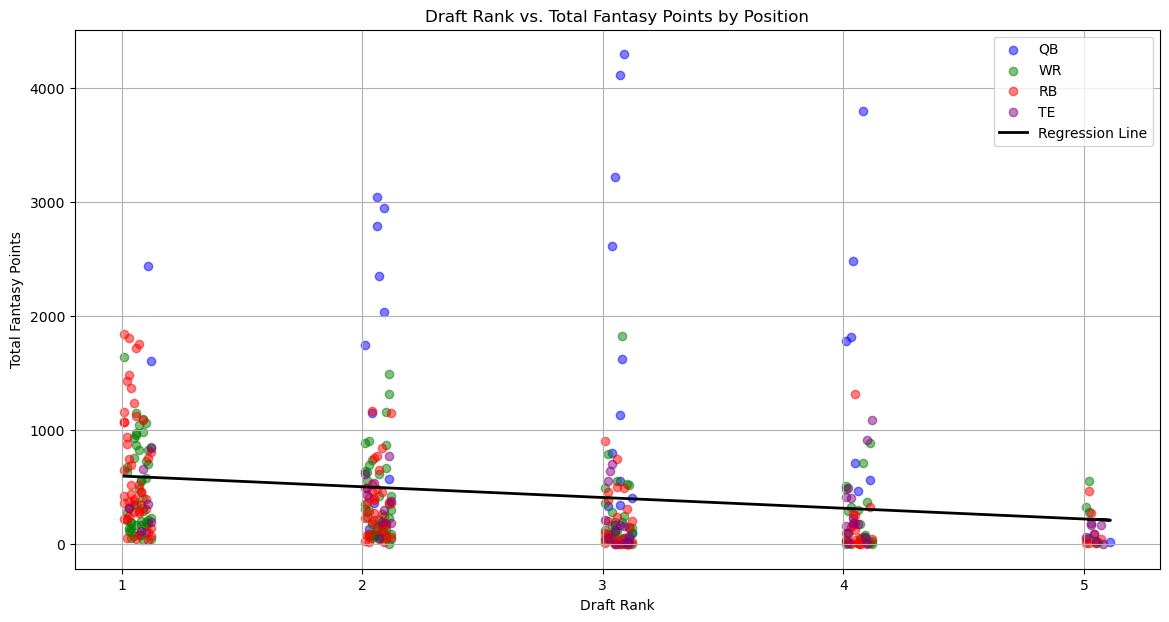

Correlation between Draft Rank and Total Fantasy Points: -0.18299538776806962
Regression Coefficients: Intercept = 692.2031583493125, Slope = -94.19427455884694
Regression results file saved to ~/Desktop/ISP Project/Regression_Results.csv


In [73]:
import seaborn as sns
import numpy as np

# Load the updated CSV file
file_path = '~/Desktop/ISP Project/Merged_Rookie_Stats_with_Fantasy_Points.csv'
df = pd.read_csv(file_path)

# Filter the dataset to include only QB, RB, TE, and WR positions
df = df[df['Pos'].isin(['QB', 'RB', 'TE', 'WR'])]

# Drop rows with missing values in 'Draft_Rank' or 'Total Fantasy Points'
df = df.dropna(subset=['Draft_Rank', 'Total Fantasy Points'])

# Define a color map for positions
position_colors = {
    'QB': 'blue',
    'WR': 'green',
    'RB': 'red',
    'TE': 'purple',
}

# Plot the draft picks vs. total fantasy points
plt.figure(figsize=(14, 7))
for pos in position_colors.keys():
    subset = df[df['Pos'] == pos]
    plt.scatter(subset['Draft_Rank'], subset['Total Fantasy Points'], alpha=0.5, label=pos, color=position_colors[pos])

plt.xlabel('Draft Rank')
plt.ylabel('Total Fantasy Points')
plt.title('Draft Rank vs. Total Fantasy Points by Position')
plt.legend(title='Position')
plt.grid(True)

# Prepare the data for regression
X = df['Draft_Rank'].values.reshape(-1, 1)
y = df['Total Fantasy Points'].values

# Create and fit the regression model
reg = LinearRegression()
reg.fit(X, y)

# Make predictions for the regression line
y_pred = reg.predict(X)

# Plot the regression line
plt.plot(df['Draft_Rank'], y_pred, color='black', linewidth=2, label='Regression Line')

plt.legend()
plt.show()

# Calculate the correlation between Draft Rank and Total Fantasy Points
correlation = df['Draft_Rank'].corr(df['Total Fantasy Points'])
print(f"Correlation between Draft Rank and Total Fantasy Points: {correlation}")

# Display the regression coefficients
print(f"Regression Coefficients: Intercept = {reg.intercept_}, Slope = {reg.coef_[0]}")

# Save the regression results to a new CSV file
regression_results = pd.DataFrame({
    'Draft_Rank': df['Draft_Rank'],
    'Total Fantasy Points': df['Total Fantasy Points'],
    'Predicted Fantasy Points': y_pred
})
regression_results_file_path = '~/Desktop/ISP Project/Regression_Results.csv'
regression_results.to_csv(regression_results_file_path, index=False)

print(f"Regression results file saved to {regression_results_file_path}")


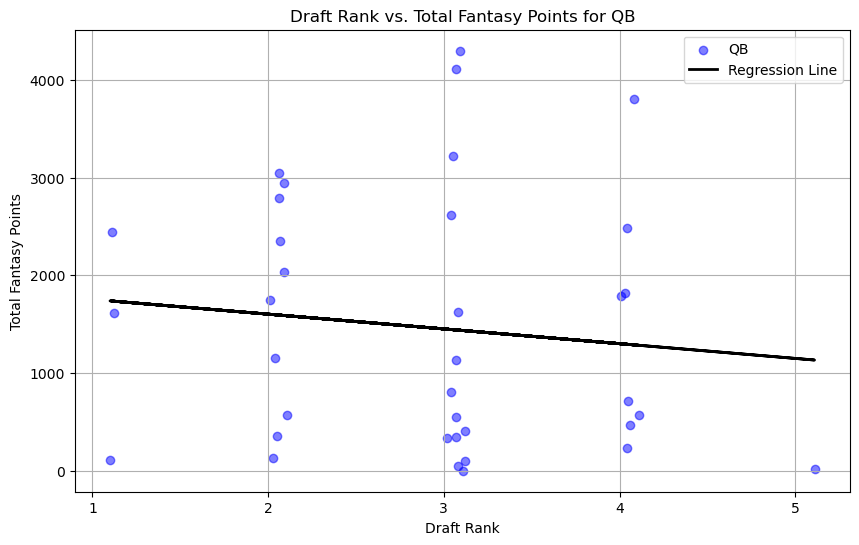

QB Regression Results:
  Correlation: -0.11358688999183919
  Intercept: 1904.0336070667895
  Slope: -150.92066846320031



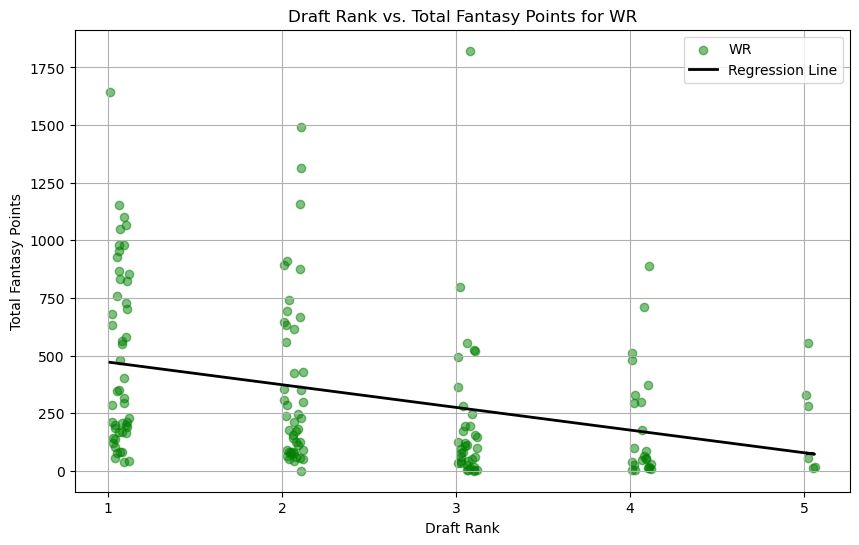

WR Regression Results:
  Correlation: -0.3144658495140305
  Intercept: 569.7146199645945
  Slope: -98.33942780676313



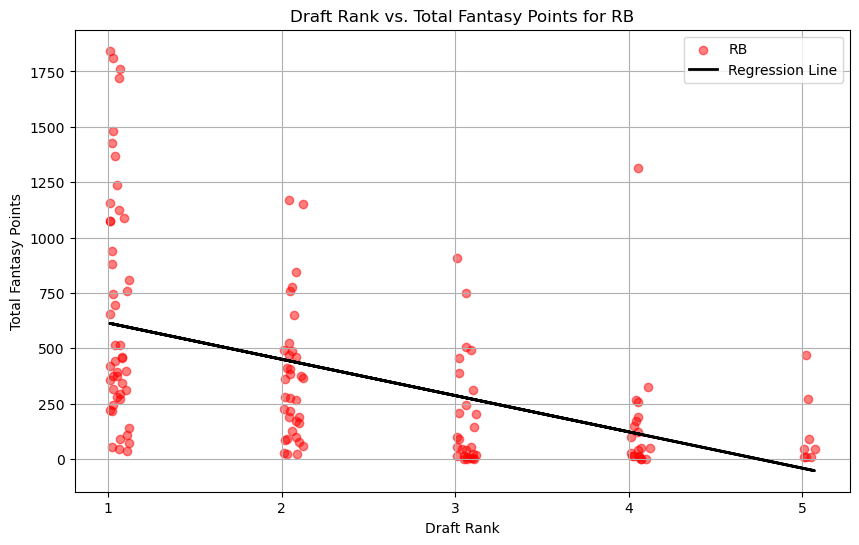

RB Regression Results:
  Correlation: -0.4722500702292322
  Intercept: 778.1051302282331
  Slope: -163.88384680038067



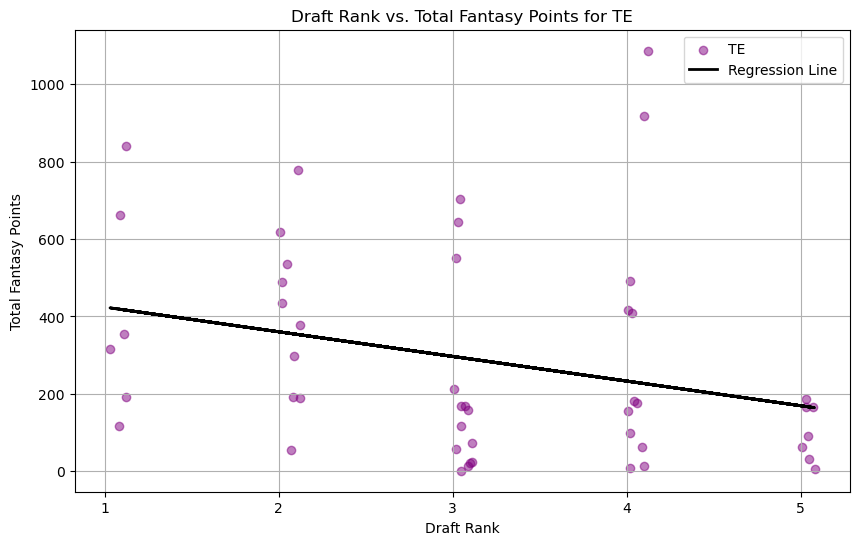

TE Regression Results:
  Correlation: -0.2871077924990307
  Intercept: 487.6774575806729
  Slope: -63.684795931776996

Regression results file saved to ~/Desktop/ISP Project/Regression_Results_by_Position.csv


In [76]:
from sklearn.linear_model import LinearRegression

# Load the updated CSV file
file_path = '~/Desktop/ISP Project/Merged_Rookie_Stats_with_Fantasy_Points.csv'
df = pd.read_csv(file_path)

# Filter the dataset to include only QB, RB, TE, and WR positions
df = df[df['Pos'].isin(['QB', 'RB', 'TE', 'WR'])]

# Drop rows with missing values in 'Draft_Rank' or 'Total Fantasy Points'
df = df.dropna(subset=['Draft_Rank', 'Total Fantasy Points'])

# Define a color map for positions
position_colors = {
    'QB': 'blue',
    'WR': 'green',
    'RB': 'red',
    'TE': 'purple',
}

# Prepare a dictionary to store regression results
regression_results = {}

# Plot and run regression tests for each position
for pos in position_colors.keys():
    subset = df[df['Pos'] == pos]
    
    # Prepare the data for regression
    X = subset['Draft_Rank'].values.reshape(-1, 1)
    y = subset['Total Fantasy Points'].values
    
    # Create and fit the regression model
    reg = LinearRegression()
    reg.fit(X, y)
    
    # Make predictions for the regression line
    y_pred = reg.predict(X)
    
    # Store regression results
    regression_results[pos] = {
        'Intercept': reg.intercept_,
        'Slope': reg.coef_[0],
        'Correlation': subset['Draft_Rank'].corr(subset['Total Fantasy Points'])
    }
    
    # Plot the draft picks vs. total fantasy points with the regression line
    plt.figure(figsize=(10, 6))
    plt.scatter(subset['Draft_Rank'], subset['Total Fantasy Points'], alpha=0.5, color=position_colors[pos], label=pos)
    plt.plot(subset['Draft_Rank'], y_pred, color='black', linewidth=2, label='Regression Line')
    plt.xlabel('Draft Rank')
    plt.ylabel('Total Fantasy Points')
    plt.title(f'Draft Rank vs. Total Fantasy Points for {pos}')
    plt.legend()
    plt.grid(True)
    plt.xticks(ticks=range(int(subset['Draft_Rank'].min()), int(subset['Draft_Rank'].max()) + 1))  # Set x-axis to whole numbers
    plt.show()
    
    # Print regression results
    print(f"{pos} Regression Results:")
    print(f"  Correlation: {regression_results[pos]['Correlation']}")
    print(f"  Intercept: {regression_results[pos]['Intercept']}")
    print(f"  Slope: {regression_results[pos]['Slope']}")
    print()

# Save the regression results to a new CSV file
regression_results_df = pd.DataFrame.from_dict(regression_results, orient='index')
regression_results_file_path = '~/Desktop/ISP Project/Regression_Results_by_Position.csv'
regression_results_df.to_csv(regression_results_file_path)

print(f"Regression results file saved to {regression_results_file_path}")

